In [1]:
import jax
import jax.numpy as jnp
import numpyro
import numpyro.distributions as dist
import numpy as np
import matplotlib.pyplot as plt
from numpyro.infer import HMC, MCMC
from numpyro.infer.initialization import init_to_value
from numpyro.infer.alternator import MultiAlternator

def gmm(D=2, mu=5, sigma=1):
    z = numpyro.sample('z', dist.Bernoulli(0.5))
    with numpyro.plate('D', D):
        numpyro.sample('theta', dist.Normal(mu * (2*z-1), sigma))

In [2]:
mu = 3

def hmc(step_size, trajectory_length):
    return HMC(gmm, step_size=step_size, trajectory_length=trajectory_length, init_strategy=init_to_value(None, values={'theta': np.array([mu+1.,mu+1.])}))

kernel = MultiAlternator([hmc(1, 10), hmc(1, 100)])

mcmc = MCMC(kernel, num_warmup=0, num_samples=1000, num_chains=1)
rng_key = jax.random.PRNGKey(0)
mcmc.run(rng_key, D=2, mu=mu, sigma=1, extra_fields=('potential_energy','accept_prob'))

sample: 100%|██████████| 1000/1000 [00:02<00:00, 352.53it/s]


In [3]:
samples = mcmc.get_samples()
samples

{'theta': DeviceArray([[3.3425179, 2.215609 ],
              [3.1050212, 2.5420613],
              [2.015934 , 3.379592 ],
              ...,
              [3.4270356, 4.7201304],
              [3.4270356, 4.7201304],
              [2.9894552, 2.7150521]], dtype=float32)}

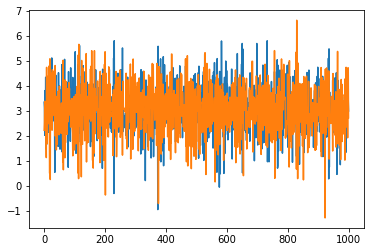

In [4]:
plt.plot(samples["theta"])

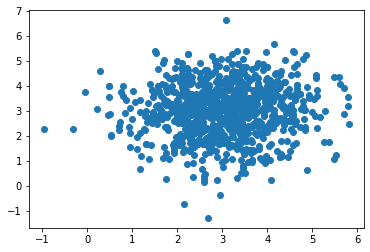

In [5]:
plt.scatter(x=samples["theta"][:,0], y=samples["theta"][:,1])

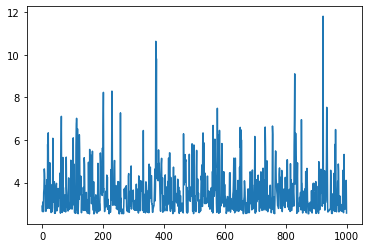

In [6]:
pe = mcmc.get_extra_fields()['potential_energy']
plt.plot(pe)

In [7]:
ap = mcmc.get_extra_fields()['accept_prob']

(array([  0.,   4.,   6.,  13.,  28.,  40.,  66.,  92., 136., 615.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <BarContainer object of 10 artists>)

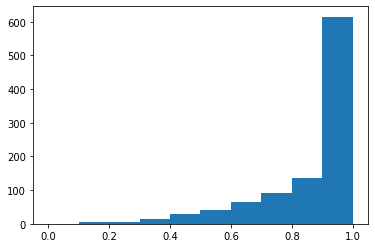

In [8]:
plt.hist(ap, range=(0,1))

In [36]:
np.mean(ap)

DeviceArray(0.72112066, dtype=float32)